# GALACTIC ECONOMY



The year is 2235. Earth's resources long ago became insufficient for the growth of the human population, and humanity was forced to look at other planets for survival of the species. At this point, following the pioneering company SpaceZ, humans have established settlements in a densely occupied area of the Milky Way with 6 planets nearby (less than a light year away). The company is in charge of the commerce and regulation of valuable resources between the planets, namely **Minerals**, **Crops** and **Fuel**. The planets need these resources for susteinability, and (starting from a initial stock) look to meet a demanded quantity for each of them. For this, they are free to exchange them with any of the other planets, both buying resources from them and selling resources to them. Moreover, to ensure competitivity among the planets, and to avoid planets to incur in excessive debt, it has been regulated that a planet can at most spend 50% more money on buying resources than the money it has earned from selling resources. The prices per kg for each resource in Galactic Standard Credits (GCSs) or simply Credits (Cs), $p^k$, are the following:


| Resource | $p^k$ (Cs)|
--------------|-----|
Minerals (k=1) | 800
Crops (k=2) | 50 
Fuel (k=3) | 350

The cost of transportation of resources for the company is of $c=\,40\,Cs/\,light\,year\cdot kg$.


**The goal of the company SpaceZ is to minimize the transport cost of the resources so that all demands are met.**

In order to ensure that the problem has a solution, it has been established that for each resource *k*, the total initial stock *$S_k$*,  is at least equal to the total demand *$D_k$* for said resource. In other words, it has been established that there is a surplus of resources, so that $S_k=\,\epsilon D_k, \, \forall \, k\in\{1,\,2,\,3\}$, with $\epsilon>=1$.

## a) Formulate mathematically the problem as a linear optimization model (based on the general formulation of an LP). Identify the model sets, parameters, variables, objective function and constraints.

The mathematical model of the problem is the following:

\begin{align*}
\underset{x_{ij}^k}{\min} & \quad \sum_{i=1}^{n}\sum_{j=1}^{n}\sum_{k=1}^{m}c_{ij}x_{ij}^k\\
\text{s.t.:}&\\
  &\sum_{j=1}^{n} x_{ji}^k-\sum_{j=1}^{n} x_{ij}^k+s_i^k\,\geq d_i^k \quad \forall i\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
  &\sum_{j=1}^{n}\sum_{k=1}^{m} p^k x_{ji}^k \leq 1.5\sum_{j=1}^{n}\sum_{k=1}^{m} p^k x_{ij}^k\quad \forall i\in\{1,\,...,\,n\}\\
  &x_{ii}^k=0\quad \forall i\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
  &x_{ij}^k \geq 0 \quad \forall i,\,j\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
\end{align*}


Let's explain the different elements of the model.

- The decision variables of the problem are $x_{ij}^k$, which are the amount (in kg) of resource *k* that is sent from planet *i* to planet *j*. These variables are defined as non negative real numbers, for it is impossible to send a negative amount of a resource. With regard to the indices, $i,j\in\{1,\,2,\,...,\,n\}$, with n being the number of planets (in our case, n=6), and $k\in\{1,\,2,\,m\}$, with m being the number of different resources (in this case, m=3). For these values, we have $n\cdot n\cdot m=\,6\cdot 6\cdot 3=$ **108 decision variables**.


- The objective function is $\sum_{i=1}^{n}\sum_{j=1}^{n}\sum_{k=1}^{m}c_{ij}x_{ij}^k$, where $c_{ij}$ is the cost of transportation per kg for the transport of a resource from planet *i* to planet *j*, which is obtained by the cost of transportation per kg and per distance, *c*, times the distance from planet i to planet j, *$d_{ij}$*. We aim to minimize this transportation cost.

- The constraints $\sum_{j=1}^{n} x_{ij}^k-\sum_{j=1}^{n} x_{ij}^k+s_i^k\,\geq d_i^k \quad \forall i\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}$ are what shall be called **"material balance constraints"** and establish the need that each planet has for each resource, given the total amount it wants to posses, $d_{i}^k$, and the amount it already has of if, its initial stock, $s_i^k$. The model has $n\cdot m=\,6\cdot3=\,18$ constraints of this type.

- The constraints $\sum_{j=1}^{n}\sum_{k=1}^{m} p^k x_{ji}^k \leq 1.5\sum_{j=1}^{n}\sum_{k=1}^{m} p^k x_{ij}^k\quad \forall i\in\{1,\,...,\,n\}$ are what shall be called **"ecomonic balance constraints"** and establish that a planet can at most spend 50% more money on buying resources than the money it has earned from selling resources. $p^k$ is the price per kg for each resource *k*. The model has $n=\,6$ constraints of this type.

- The constraints $x_{ii}^k=0\quad \forall \,i\in\{1,\,...,\,m\} \forall \,k\in\{1,\,...,\,m\}$ are what shall be called the **"inner commerce constraints"** and establish that no resources can be exchanged within the same planet. This makes sense as the problem is formulated, for the resources remain in the same planet, and the net exchange of resources from planet *i* to planet *i* is obviously zero. The model has $m=\,3$ constraints of this type.

- The model has a total of $18+6+3=$ **27 constraints**.



## b) Implement the model in Pyomo and solve it for a set of (parameter) values, either based on real-world or randomly generated data (make sure that the values you use are coherent with the model defined in a)). In both cases, include your model and the specific data you have used.

First of all, it is required to obtain the data for the problem. For that, a random matrix of distances among the planets will be generated, as well as randomly generated demands and initial stocks for each resource for each planet.

In [1]:
import numpy as np

##GENERATION OF DATA##


#Set a seed so the results can be replicated
np.random.seed(241024)

n=6 #number of planets
m=3 #number of resources

c= 40 #cost per kg per light year

p=np.array([800, 50, 350]) #price per kg of resource

#Distance matrix 

upper_tri = np.random.uniform(0, 1, size=(n, n)) #randomly generate an upper triangular matrix with values uniformly distributed
                                                 #between 0 and 1

dist= np.triu(upper_tri) + np.triu(upper_tri, 1).T #create a symmetric matrix by adding the upper triangular matrix and its
                                                   #transpose

np.fill_diagonal(dist,0) #fill the diagonal with zeros (the distance from a planet to itself is zero)


#Cost matrix

cost=c*dist

#Demand matrix

d_1=np.random.uniform(0, 500, size=n) #generate random demands of resource 1 (minerals) for each planet

D1=sum(d_1) #total demand of resource 1 (minerals)

d_2=np.random.uniform(0, 1200, size=n) #generate random demands of resource 2 (crops) for each planet

D2=sum(d_2) #total demand of resource 2 (crops)

d_3=np.random.uniform(0,350, size=n) #generate random demands for resource 3 (fuel)

D3=sum(d_3) #total demand of resource 3 (fuel)

dem=np.column_stack((d_1, d_2, d_3))

#Stock matrix

epsilon=1 #defines surplus of resources

S1=epsilon*D1 #defines the total amount of resource 1 available

s_1=np.random.dirichlet(np.ones(n))*S1 #generate random set of proportions so that the total stock is shared among all the 
                                       #planets

S2=epsilon*D2 #defines the total amount of resource 2 available

s_2=np.random.dirichlet(np.ones(n))*S2 #generate random set of proportions so that the total stock is shared among all the 
                                       #planets

S3=epsilon*D3 #defines the total amount of resource 2 available

s_3=np.random.dirichlet(np.ones(n))*S3 #generate random set of proportions so that the total stock is shared among all the 
                                       #planets


stock=np.column_stack((s_1, s_2, s_3))


The following code shows the distances among the different planets, where $d(i,j)$ is the distance between planet *i* and planet *j* in light years. As the distances are symmetric, the distance between each two planets is only shown once.

In [2]:
print('Distances between planets (light years)')
print(' ')
for i in range(0,n):
    for j in range (i+1,n):
        print('dist(',i+1, ',',j+1,')= ', dist[i,j])

Distances between planets (light years)
 
dist( 1 , 2 )=  0.4384226953450193
dist( 1 , 3 )=  0.3955053216948524
dist( 1 , 4 )=  0.7699351166058933
dist( 1 , 5 )=  0.9335093620002046
dist( 1 , 6 )=  0.275306202481882
dist( 2 , 3 )=  0.6497163780715765
dist( 2 , 4 )=  0.9378220559114848
dist( 2 , 5 )=  0.9706064218345486
dist( 2 , 6 )=  0.35054850431422024
dist( 3 , 4 )=  0.9521844277111974
dist( 3 , 5 )=  0.15295958490892692
dist( 3 , 6 )=  0.20897392647943946
dist( 4 , 5 )=  0.9105355393170441
dist( 4 , 6 )=  0.6511737270295068
dist( 5 , 6 )=  0.025684483603624964


Below, the stocks and demands of each of the planets for each of the resources are shown, as well as the need of each planet for each resource (their demand of it minus the stock they already have of it). $stock(i,k)$ is the initial stock of planet *i* for the resource *k*, $dem(i,k)$ is the demand of planet *i* for resource *k*, and $need(i,k)$ is the need of planet *i* for resource *k* (positive if the demand is greater than the stock, meaning the planet needs more, and negative if the demand is lower than the stock, meaning there is an excess of the resource in the planet).

In [3]:
print('Stocks, demands and needs of resources per planet (kg)')
print(' ')
print(' ')

for i in range(0,n):
    for k in range (0,m):
        print('stock(',i+1, ',',k+1,')= ', stock[i,k], '| dem(',i+1, ',',k+1,')= ', dem[i,k], '| need(',i+1, ',',k+1,')= ', dem[i,k]-stock[i,k])
    print(' ')

Stocks, demands and needs of resources per planet (kg)
 
 
stock( 1 , 1 )=  109.63419208492945 | dem( 1 , 1 )=  133.95587109857183 | need( 1 , 1 )=  24.32167901364238
stock( 1 , 2 )=  1264.398467305732 | dem( 1 , 2 )=  655.7015702977704 | need( 1 , 2 )=  -608.6968970079616
stock( 1 , 3 )=  165.0253439684896 | dem( 1 , 3 )=  330.45171925365895 | need( 1 , 3 )=  165.42637528516934
 
stock( 2 , 1 )=  191.14557705663412 | dem( 2 , 1 )=  136.9345902759727 | need( 2 , 1 )=  -54.210986780661415
stock( 2 , 2 )=  1064.681161629941 | dem( 2 , 2 )=  410.1717192709618 | need( 2 , 2 )=  -654.5094423589792
stock( 2 , 3 )=  443.8654293753781 | dem( 2 , 3 )=  315.26159596878244 | need( 2 , 3 )=  -128.60383340659564
 
stock( 3 , 1 )=  12.40486981164669 | dem( 3 , 1 )=  339.8178724879172 | need( 3 , 1 )=  327.41300267627054
stock( 3 , 2 )=  19.00250409077287 | dem( 3 , 2 )=  288.4369872075736 | need( 3 , 2 )=  269.4344831168008
stock( 3 , 3 )=  54.81160006684485 | dem( 3 , 3 )=  73.67179480382553 | need

Once the data is obtained, the model can be implemented on pyomo.

In [4]:
##IMPLEMENTATION OF MODEL

#Import the pyomo package and the solver
import pyomo.environ as pyo
from pyomo.environ import *
opt = pyo.SolverFactory('glpk')

#Create the model
model = pyo.ConcreteModel(name="ECON") 

#Define the sets
model.I = pyo.RangeSet(1,n)
model.J = pyo.RangeSet(1,n)
model.K =pyo.RangeSet(1,m)

#Define the variables
model.x = pyo.Var(model.I, model.J, model.K, domain=pyo.NonNegativeReals, initialize=0) 

#Define the objective function
def Obj_rule(model):
    return sum(cost[i-1,j-1]*model.x[i,j,k] for i in model.I for j in model.J for k in model.K)
model.Obj = pyo.Objective(rule=Obj_rule, sense=pyo.minimize)

#Define the constraints


def material_constraint_rule(model, i, k): #material constraints
    return sum(model.x[j,i,k]-model.x[i,j,k] for j in model.J if (i!=j)) >= dem[i-1,k-1]-stock[i-1,k-1] #define the condition
model.material_Constraint = pyo.Constraint(model.I, model.K, rule=material_constraint_rule) #add the constraints to the model

def econ_constraint_rule(model, i): #economic constraints
    return sum(p[k-1]*model.x[j,i,k]-1.5*p[k-1]*model.x[i,j,k] for j in model.J if (i!=j) for k in model.K)<=0
model.econ_Constraint = pyo.Constraint(model.I, rule=econ_constraint_rule)
    
def no_inner_constraint_rule(model,i,k): #inner constraints 
    return model.x[i,i,k] == 0
model.no_inner_Constraint = pyo.Constraint(model.I, model.K, rule=no_inner_constraint_rule)

    




In [5]:
#Get the solution

results = opt.solve(model,tee=True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\USUARIO\AppData\Local\Temp\tmpno345017.glpk.raw --wglp C:\Users\USUARIO\AppData\Local\Temp\tmpudffw9ei.glpk.glp
 --cpxlp C:\Users\USUARIO\AppData\Local\Temp\tmp1mgsaqdr.pyomo.lp
Reading problem data from 'C:\Users\USUARIO\AppData\Local\Temp\tmp1mgsaqdr.pyomo.lp'...
42 rows, 108 columns, 378 non-zeros
711 lines were read
Writing problem data to 'C:\Users\USUARIO\AppData\Local\Temp\tmpudffw9ei.glpk.glp'...
645 lines were written
GLPK Simplex Optimizer, v4.65
42 rows, 108 columns, 378 non-zeros
Preprocessing...
24 rows, 90 columns, 360 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.200e+03  ratio =  1.200e+03
GM: min|aij| =  8.165e-01  max|aij| =  1.225e+00  ratio =  1.500e+00
EQ: min|aij| =  6.667e-01  max|aij| =  1.000e+00  ratio =  1.500e+00
Constructing initial basis...
Size of triangular part is 24
      0: obj =   0.000000000e+00 inf =   2.995e+03 (10)
     22: obj =   1.35

In [6]:
print('The total cost of transportation of resources is ', model.Obj(), 'Cs')

The total cost of transportation of resources is  62094.21358522732 Cs


The following code shows the exchanges of resources that take place among the planets, in kg. $x(i,j,k)$ is the amount of resource *k* that is sent from planet *i* to planet *j*.

In [7]:
print('Exchanged quantities of resources (kg)')
print(' ')
x_sol_1=np.zeros((n,n))
x_sol_2=np.zeros((n,n))
x_sol_3=np.zeros((n,n))
for i in range(0,n):
    print(' ')
    for j in range(0,n):
        x_sol_1[i,j]=pyo.value(model.x[i+1,j+1,1])
        x_sol_2[i,j]=pyo.value(model.x[i+1,j+1,2])
        x_sol_3[i,j]=pyo.value(model.x[i+1, j+1,3])
        if x_sol_1[i,j]!=0:
            print('x(',i+1,', ',j+1,', 1)= ', x_sol_1[i,j])
        if x_sol_2[i,j]!=0:
            print('x(',i+1,', ',j+1,', 2)= ', x_sol_2[i,j])
        if x_sol_3[i,j]!=0:
            print('x(',i+1,', ',j+1,', 3)= ', x_sol_3[i,j])

Exchanged quantities of resources (kg)
 
 
x( 1 ,  4 , 1)=  79.2607682128152
x( 1 ,  4 , 2)=  608.696897007962
 
x( 2 ,  1 , 3)=  128.603833406595
x( 2 ,  4 , 1)=  54.2109867806621
x( 2 ,  4 , 2)=  27.9493000457421
x( 2 ,  6 , 2)=  626.560142313236
 
x( 3 ,  5 , 1)=  705.007986137
 
x( 4 ,  1 , 1)=  103.582447226458
x( 4 ,  1 , 3)=  36.8225418785739
x( 4 ,  6 , 1)=  16.878135555773
x( 4 ,  6 , 3)=  177.495130041965
 
x( 5 ,  3 , 1)=  1032.42098881327
x( 5 ,  3 , 2)=  269.434483116801
x( 5 ,  3 , 3)=  18.8601947369807
 
x( 6 ,  4 , 1)=  148.074704061866
x( 6 ,  5 , 1)=  287.231140049965
x( 6 ,  5 , 2)=  739.580751442712
x( 6 ,  5 , 3)=  88.5924242806372


## c) Compute the sensitivities associated with each constraint, and interpret the values of those you may consider more important.

It is found that the solutions from the dual problem are the sensitivitivies associated to each of the constraints. So, to obtain the sensivities of the problem, the dual problem will be implemented on pyomo, and the solutions will be analyzed.

In [8]:
model.dual = Suffix(direction=Suffix.IMPORT)  #import the dual values to our model
results = opt.solve(model, tee=True)

#Print the dual value associated to each constraint
for suffix_name in model.component_objects(Suffix, active=True):
    print(f"Suffix: {suffix_name.name}")
    suffix_name.pprint()


GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\USUARIO\AppData\Local\Temp\tmpiu8jpci3.glpk.raw --wglp C:\Users\USUARIO\AppData\Local\Temp\tmpayx3rtef.glpk.glp
 --cpxlp C:\Users\USUARIO\AppData\Local\Temp\tmp4r34si3o.pyomo.lp
Reading problem data from 'C:\Users\USUARIO\AppData\Local\Temp\tmp4r34si3o.pyomo.lp'...
42 rows, 108 columns, 378 non-zeros
711 lines were read
Writing problem data to 'C:\Users\USUARIO\AppData\Local\Temp\tmpayx3rtef.glpk.glp'...
645 lines were written
GLPK Simplex Optimizer, v4.65
42 rows, 108 columns, 378 non-zeros
Preprocessing...
24 rows, 90 columns, 360 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.200e+03  ratio =  1.200e+03
GM: min|aij| =  8.165e-01  max|aij| =  1.225e+00  ratio =  1.500e+00
EQ: min|aij| =  6.667e-01  max|aij| =  1.000e+00  ratio =  1.500e+00
Constructing initial basis...
Size of triangular part is 24
      0: obj =   0.000000000e+00 inf =   2.995e+03 (10)
     22: obj =   1.35

To proceed with the interpretation of the sensitivities, it is necessary to first correctly identify the constraints.

#### **"Ecomonic balance constraints"**
For the **"ecomonic balance constraints"** (named in the code above by $econ\_Constraint[i]$), adding a quantity $\hat{b_i}$ to the right hand side (that means, changing the intercept of the hyperplane defined by the constraint) means that we allow the planet associated with each constraint to have an extra debt of $\hat{b}$, meaning it can spend at most $1.5$ times the money it earns plus $\hat{b_i}$ (note that $\hat{b_i}$ may be positive of negative). This way, it is found that a change in the flexibility of the debt for each planet (increasing it by a given fixed quantity) has the following effect in the total transportation cost:

- If the debt of planets 2, 5 or 6 is changed, the total transportation cost remains constant. This suggests that these planets have a "healthy economy", and do not require to take its debt to the maximum allowed to reach its desired amount of resources.

- If the debt of planets 1, 3, or 4 is changed, the total transportation cost is reduced if the debt is relaxed (that is, if $\hat{b_i}>0$), and is increased if the debt is made more restrictive ($\hat{b_i}<0$). Specifically, the transportation cost is reduced by $0.0237522779152774$ Cs per each extra Cs planet 1 is allowed to spend (consider the case $\hat{b_i}=1$), by $0.0305919169817858$ Cs per each extra Cs planet 3 is allowed to spend, and by $0.130234745405902$ Cs per each extra Cs planet 4 is allowed to spend. Analogously, the transportation cost will be increased by the same amounts per each less Cs that the given planet is allowed to spen (consider the case $\hat{b_i}=-1$). The conclusion that may be drawn from this is that planet 6 is the one with the weakest economy (maybe because it is further away from the rest of the planets or has a natural scarcity of resources, may be a vanguard base or a recent far settlement, for example), and it should be prioritized to relax its debt for the economy to work better.

#### **"Material balance constraints"**

For the **"material balance constraints"** (named in the code above by $material\_Constraint[i,k]$), adding a quantity $\hat{b_i^k}$ to the right hand side means that the need of planet *i* for resource *k* is changed by an amount of $\hat{b_i^k}$ kg. It is possible to associate a positive $\hat{b_i^k}$ as an increase of the demand of resource *k* in planet *i*, and a negative value to an increase of the correspondent initial stock. The change in the initial distribution of the resources and its demands has the following effect on the transportation cost:

- For planet 2, the change in its demands and initial stocks doesn't change the transportation cost. This means that the material constraints associated to planet 2 don't have an effect in the determination of the optimal solution, and so that there are other more restrictive constraints upon which the optimal solution lies, and thus their change does affect that optimal solution. This may be because planet 2 has a big surplus for each of the resources and so its constraints are not as restrictive as others. Note that no resources of any kind are sent to planet 2, as can be seen in the solutions.

- For the rest of the planets, we see that an increase in the need for each of the resources (which can be interpreted as an increase in its demand for that given resource) provokes an increase of the transportation cost, as if more kg need to be supplied to a planet because its need for a given resource is increased, the transportation cost is therefore increased (remember that it directly depends on the quantity of resources exchanged). The interpretation is the same as for the economic constraints, for each kg the need associated to each constraint increases, the total transportation cost increases by the correspondent dual value. As an interesting value, the highest change in the total transportation cost is found when the need for planet 4 of resource 1 (minerals) is increased. It can be seen in the solutions to the model that a lot of exchanges involve planet 4 and resource 1, so it is a huge interconnection node of the system.

#### **"Inner commerce constraints"**

These constraints are just to eliminate variables from the model, and so their modification doesn't alter the optimal solution. In fact, they do not contribute to the objective function, as the transportation cost associated to each variable depends on the distance between the corresponding planets involved times a constant price per distance, and the distance from a planet to itself is zero by definition.

## d) Derive the dual problem associated with a) and solve it in Pyomo. Does the Strong Duality hold?

Let's consider an optimization problem with the following formulation:

\begin{align*}
\underset{x}{\min} & \quad z_P=\,c^Tx\\
\text{s.t.:}&\\
  &Ax=\,b\\
  &x \geq 0\\
\end{align*}

In this case, the corresponding dual problem is given by:

\begin{align*}
\underset{y}{\max} & \quad z_D=\,b^Ty\\
\text{s.t.:}&\\
  &A^Ty\leq\,c\\
  &y\in \mathbb{R}\\
\end{align*}

In order to obtain the dual problem for this case, it is first necessary to rewrite the constraints so that it fits the formulation seen above, to be able to find the correspondent dual problem.

The problem properly rewritten follows the following formulation:

\begin{align*}
\underset{x_{ij}^k}{\min} & \quad \sum_{i=1}^{n}\sum_{j=1}^{n}\sum_{k=1}^{m}c_{ij}x_{ij}^k\\
\text{s.t.:}&\\
  &\sum_{j=1}^{n} x_{ji}^k-\sum_{j=1}^{n} x_{ij}^k - y_i^k\,= d_i^k - s_i^k \quad \forall i\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
  &\sum_{j=1}^{n}\sum_{k=1}^{m} p^k x_{ji}^k -  1.5\sum_{j=1}^{n}\sum_{k=1}^{m} p^k x_{ij}^k + z_i= 0\quad \forall i\in\{1,\,...,\,n\}\\
  &x_{ii}^k=0\quad \forall i\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
  &x_{ij}^k \geq 0 \quad \forall i,\,j\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
  &y_i^k \geq 0 \quad \forall i\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
  &z_i\geq 0 \quad \forall i\in\{1,\,...,\,n\}\\
\end{align*}

Two different types of dummy variables have been added to the model: a variable $y_i^k$ per each "material balance constraint" ($n\cdot m=\,6\cdot 3=$ 18 extra variables), and a variable $z_i$ per each "economic balance constraint" ($n=$ 6 extra variables). Note that, when it was needed to turn a "greater than" inequality into an equality, the dummy variable was substracted from the constraint (material case), and when it was needed to turn a "less than" inequality into an equality, the dummy variable was added to the constraint (economic case).

Now that the problem is properly formulated, the formulation of the dual problem is immediate:

\begin{align*}
\underset{y}{\max} & \quad z_D=\,b^Ty\\
\text{s.t.:}&\\
  &A^Ty\leq\,c\\
  &y\in \mathbb{R}\\
\end{align*}

The issue now is to find the matrix coefficient of the adjusted original problem, $A$, as well as the coefficient vector of the objective function, $c$, and the vector of the independent terms of the constraints, $b$. 


To obtain the matrix of the model, a code was created to generate the correspondent matrix for each of the constraints, and then the matrices were combined together by rows. 
The order of the variables in the model is as it follows: first, with a sending planet *i* and a receiving planet *j*, the material is iterated, and then the receiving planet is changed and all the materials are iterated again. Once all the receiving planets are done, the sending planet *i* changes and the process is repeated all over again:

$ x_{ij}^k=x[i,j,k]: x[1,1,1]\rightarrow x[1,1,2]\rightarrow x[1,1,3]\rightarrow x[1,2,1]\rightarrow x[1,2,2]\rightarrow x[1,2,3]\rightarrow x[1,3,1]\rightarrow ...\rightarrow x[1,5,3]\rightarrow x[1,6,1]\rightarrow x[1,6,2]\rightarrow x[1,6,3]\rightarrow x[2,1,1]\rightarrow ...$

This is the way that the variables are ordered in the vector *x* of the model. After the original variables, the variables $y_i^k$ are added on the vector, following the same order (first advancing in the first order and then in the second): 

$y_i^k=y[i,k]: y[1,1]\rightarrow y[1,2]\rightarrow y[1,3]\rightarrow y[2,1]\rightarrow ...$

Finally, the last variables of the variable vector *x* are the variables $z_i$, ordered in the usual way.

This way, the variable vector *x* is $x=[x_{ij}^k,\,y_i^k,\,z_i]$

It is very important that these concepts are clear in order to be able to draw the matrix of the model from the coefficients associated to each of the variables.

To correctly define the cost vector *c*, note that the cost depends only on the distance between planets, that is, on *i* and *j* only, and not on the type of material (index *k*). This way, $c_{ij}^k=c_{ij} \quad \forall k\in{1,\,...,\,m}$. This way, in the cost vector *c* (which must be of the same length as the vector *x*), each cost is repeated *m* times before the value changes, when it corresponds to the variables $x_{ij}^k$, and is 0 for the positions of the dummy variables (per definition, they don't affect the objective function).

For the independent terms vector, *b*, it can easily be extracted from the constraints. Its values are the "need vector" (the difference between the demand and the stock for a given constraint) for the "material balance constraints", and 0 for the rest of the constraints. The vector's length is the number of constraints of the problem.

In [9]:
#Generate matrix for material constraints

n_var_x=n*n*m #number of variables (with dummies)

n_var_p=n*m #number of variables per planet


#Generate a vector that keeps track of the sending planet involved in the variable
contador=np.zeros(n_var_x)

for i in range(n):
    for j in range(i*n_var_p, (i+1)*n_var_p):
        contador[j]=i   
    
contador=contador.astype(int)


#Gemerate a vector that keeps track of the material involved in the variable
material_i=np.array(range(m))

material=np.tile(material_i, n*n).astype(int)


#Generate a vector that keeps track of the receiving planet involved in the variable
end=np.repeat(np.arange(n),m)       




In [10]:
#Generate matrix for the material constraints

for i in range(n):
    mat=np.zeros((m, n_var_x))
    for k in range(m):
        for planet in range(n):
            for j in range(planet*m*n,(planet+1)*m*n):
                ind=j-planet*m*n
                if material[j]==k:
                    if end[ind]!=planet:
                        if i==contador[j]:
                            mat[k,j]=-1
                        elif i!=contador[j] and end[ind]==i:
                            mat[k,j]=1
    if i==0:
        A1=mat
    else:
        A1=np.vstack((A1,mat))    


A1=np.hstack((A1,np.diag([-1]*n*m)))

A1=np.hstack((A1,np.zeros((n*m,n))))

print(A1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
#Generate matrix for the economic constraints

ec=np.zeros((n,n_var_x))
for i in range(n):    
    for j in range(n_var_x):
        for planet in range(n):
                for j in range(planet*m*n,(planet+1)*m*n):
                    ind=j-planet*m*n
                    ident=int(material[j])
                    if end[ind]!=planet:
                        if i==contador[j]:
                            ec[i,j]=-1.5*p[ident]
                        elif i!=contador[j] and end[ind]==i:
                            ec[i,j]=p[ident]



A2=np.hstack((ec,np.zeros((n,n*m))))

A2=np.hstack((A2,np.diag([1]*n)))




In [12]:
#Generate matrix for inner constraints


for i in range(n):
    inner=np.zeros((m, n_var_x))
    for k in range(m):
        for planet in range(n):
            for j in range(planet*m*n,(planet+1)*m*n):
                ind=j-planet*m*n
                if material[j]==k:
                    if end[ind]==planet==i:
                        inner[k,j]=1
    if i==0:
        A3=inner
    else:
        A3=np.vstack((A3,inner))

A3=np.hstack((A3,np.zeros((m*n,m*n+n))))



In [13]:
#Get the model matrix by joining the matrix of each constraint by rows

A=np.vstack((A1,A2,A3))

#Transpose the model matrix to use is as the model matrix of the dual problem
A_t=A.T




In [14]:
#Get the cost vector and the independent terms vector

#Cost vector
cost_vector=cost.reshape(-1)

new_cost_vector=np.repeat(cost_vector,m)

cost_vector_final=np.concatenate((new_cost_vector, np.zeros(A_t.shape[0]-n*m)))

#Independent terms vector
need=np.zeros((n,m))
for i in range(0,n):
    for k in range (0,m):
        need[i,k]=dem[i,k]-stock[i,k]
need_vec=need.reshape(-1)

indep=np.concatenate((need_vec,np.zeros(A_t.shape[1]-len(need_vec))))



        

Now that the matrix model and the cost and independent terms vectors have been defined, the dual problem can be implemented in pyomo.

In [15]:
##IMPLEMENTATION OF THE DUAL MODEL
model2 = pyo.ConcreteModel(name="ECON DUAL")

#Sets
model2.I = pyo.RangeSet(1,A_t.shape[0])
model2.J =pyo.RangeSet(1,A_t.shape[1])

#Variables
model2.x= pyo.Var(model2.J, domain=pyo.Reals, initialize=0) 

#Objective function
def Obj_rule(model2):
    return sum(indep[j-1]*model2.x[j] for j in model2.J)
model2.Obj = pyo.Objective(rule=Obj_rule, sense=pyo.maximize)

#Constraints
def dual_constraint_rule(model2, i): 
    return sum(A_t[i-1,j-1]*model2.x[j] for j in model2.J) <= cost_vector_final[i-1]
model2.dual_Constraint = pyo.Constraint(model2.I, rule=dual_constraint_rule)


In [16]:
#Get the results
results = opt.solve(model2,tee=True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\USUARIO\AppData\Local\Temp\tmp2bvx382w.glpk.raw --wglp C:\Users\USUARIO\AppData\Local\Temp\tmpf4qcetbc.glpk.glp
 --cpxlp C:\Users\USUARIO\AppData\Local\Temp\tmpj00qlp69.pyomo.lp
Reading problem data from 'C:\Users\USUARIO\AppData\Local\Temp\tmpj00qlp69.pyomo.lp'...
132 rows, 42 columns, 402 non-zeros
867 lines were read
Writing problem data to 'C:\Users\USUARIO\AppData\Local\Temp\tmpf4qcetbc.glpk.glp'...
771 lines were written
GLPK Simplex Optimizer, v4.65
132 rows, 42 columns, 402 non-zeros
Preprocessing...
90 rows, 24 columns, 360 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.200e+03  ratio =  1.200e+03
GM: min|aij| =  8.165e-01  max|aij| =  1.225e+00  ratio =  1.500e+00
EQ: min|aij| =  6.667e-01  max|aij| =  1.000e+00  ratio =  1.500e+00
Constructing initial basis...
Size of triangular part is 90
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (10)
*    23: obj =   6.20

In [17]:
print('The value of the objective function for the dual problem is ', model2.Obj())

The value of the objective function for the dual problem is  62094.21358522731


The Strong Duality Holds, as the value of the objective functions is the same for the primal problem and for the dual problem, and thus the duality gap is zero. 

In [18]:
#Show the values of the dual variables
model2.x.display()

x : Size=42, Index=J
    Key : Lower : Value               : Upper : Fixed : Stale : Domain
      1 :  None :    35.2182110705564 :  None : False : False :  Reals
      2 :  None :    8.49689841586946 :  None : False : False :  Reals
      3 :  None :    25.8502050841478 :  None : False : False :  Reals
      4 :  None :                -0.0 :  None : False : False :  Reals
      5 :  None :                -0.0 :  None : False : False :  Reals
      6 :  None :                -0.0 :  None : False : False :  Reals
      7 :  None :    43.0852294812095 :  None : False : False :  Reals
      8 :  None :    22.6972987621602 :  None : False : False :  Reals
      9 :  None :    30.6393859148723 :  None : False : False :  Reals
     10 :  None :    141.700678561181 :  None : False : False :  Reals
     11 :  None :    44.0246195067545 :  None : False : False :  Reals
     12 :  None :    55.1127444876633 :  None : False : False :  Reals
     13 :  None :    12.4933124994241 :  None : False : 

Looking at the solutions for the dual problem, they are the same as the sensitivities for the primal problem, as they are supposed to be.

## e) Modify the problem in a) to impose some logical or conditional (linear) constraints that require the use of binary or integer variables. If needed, the model can besubstantially different than a). Implement and solve this new model in Pyomo and interpret the results. Include the data used for the solution of the problem.

Due to the complications arisen from interspatial bureaucracy and use of travel routes, it has been established by the company SpaceZ that **the number of planets with which the planets can exchange goods mustn't be greater than 2**, if possible. Due to this, the problem must be changed with the introduction of binary variables, that establish whether an exchange between planets takes place or not.

The new variables are defined as follows:


$$y_{ij}=\left\{\begin{array}{ll}
1 & \textrm{if planet $i$ sends any resource to planet $j$}\\
0 & \textrm{if planet $i$ does't send any resource to planet $j$}
\end{array}\right.$$

With them, the formulation of the new model is as follows:

\begin{align*}
\underset{x_{ij}^k}{\min} & \quad \sum_{i=1}^{n}\sum_{j=1,\,j\neq i}^{n}\sum_{k=1}^{m}c_{ij}x_{ij}^k\\
\text{s.t.:}&\\
  &\sum_{j=1}^{n} x_{ji}^k-\sum_{j=1}^{n} x_{ij}^k+s_i^k\,\geq d_i^k \quad \forall i\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
  &\sum_{j=1}^{n}\sum_{k=1}^{m} p^k x_{ji}^k \leq 1.5\sum_{j=1}^{n}\sum_{k=1}^{m} p^k x_{ij}^k\quad \forall i\in\{1,\,...,\,n\}\\
  &x_{ii}^k=0\quad \forall i\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
  &x_{ij}^k\leq M\cdot y_{ij} \quad \forall i,j\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
  &\sum_{j=1}^n y_{ij} \leq 2 \quad \forall i\in\{1,\,...,\,n\}\\
  &y_{ij}=y_{ij} \quad \forall i,j\in\{1,\,...,\,n\}\\
  &x_{ij}^k \geq 0 \quad \forall i,\,j\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}\\
  &y_{ij}\in\{0,1\}
\end{align*}

To understand the new model, the new constraints must be explained:

- **$\underline{x_{ij}^k\leq M\cdot y_{ij} \quad \forall i,j\in\{1,\,...,\,n\},\,k\in\{1,\,...,\,m\}}$**: this constraint limits the value of the exchanged resources from planet *i* to planet *j* depending on the value of the binary variable $y_{ij}$. If $y_{ij}=0$, then the two planets can't exchange resources, and thus $x_{ij}^k=0 \quad \forall k\in\{1,\,...,\,m\}$. If $y_{ij}=1$, then the planets can exchange resources, so that $x_{ij}^k$ can be greater than 0. The scalar *M* is chosen big enough  (bigger than the range of the problem, depending on the initial conditions) so that it doesn't limit the possible values that $x_{ij}^k>0$ may take.

- **$\underline{\sum_{j=1}^n y_{ij} \leq 2 \quad \forall i\in\{1,\,...,\,n\}}$**: this constraint limits the number of planets each planet can exchange resources with to 2(different cases for sending resources and receiving resources).

- **$\underline{y_{ij}=y_{ij} \quad \forall i,j\in\{1,\,...,\,n\}}$**: this constraint eliminates the difference between the sending and the receiving cases, and simply takes into account a transaction in a general sense, so that exchanges are always with the same planets (for instance, to avoid that a planet sends resources to two planets and receives resources from two different ones).


Now that the new model is defined, it is time to implement it on pyomo.

In [19]:
##IMPLEMENTATION OF MODEL

#Import the pyomo package and the solver
import pyomo.environ as pyo
from pyomo.environ import *
opt = pyo.SolverFactory('glpk')

#Create the model
model = pyo.ConcreteModel(name="ECON")

#Sets
model.I = pyo.RangeSet(1,n)
model.J = pyo.RangeSet(1,n)
model.K =pyo.RangeSet(1,m)

M=5000 #define the upper limit for the non-zero continuous variables

#Variables
model.x = pyo.Var(model.I, model.J, model.K, domain=pyo.NonNegativeReals, initialize=0)

model.y =pyo.Var(model.I, model.J, domain=pyo.Binary) #define the binary variables

#Objective function
def Obj_rule(model):
    return sum(cost[i-1,j-1]*model.x[i,j,k] for i in model.I for j in model.J for k in model.K)
model.Obj = pyo.Objective(rule=Obj_rule, sense=pyo.minimize)

#Linear continuous constraints

def material_constraint_rule(model, i, k): 
    return sum(model.x[j,i,k]-model.x[i,j,k] for j in model.J if (i!=j)) >= dem[i-1,k-1]-stock[i-1,k-1]
model.material_Constraint = pyo.Constraint(model.I, model.K, rule=material_constraint_rule)

def econ_constraint_rule(model, i):
    return sum(p[k-1]*model.x[j,i,k]-1.5*p[k-1]*model.x[i,j,k] for j in model.J if (i!=j) for k in model.K)<=0
model.econ_Constraint = pyo.Constraint(model.I, rule=econ_constraint_rule)
    
def no_inner_constraint_rule(model,i,k):
    return model.x[i,i,k] == 0
model.no_inner_Constraint = pyo.Constraint(model.I, model.K, rule=no_inner_constraint_rule)

#Linear binary constraints
def exchange_existence_constraint_rule(model, i, j, k):
    return model.x[i,j,k] <=M*model.y[i,j]
model.exchange_existence_Constraint = pyo.Constraint(model.I, model.J, model.K, rule=exchange_existence_constraint_rule)

def limit_exchanges_constraint_rule(model, i):
    return sum(model.y[i,j] for j in model.J)<=2
model.limit_exchanges_Constraint=pyo.Constraint(model.I, rule=limit_exchanges_constraint_rule)

def equality_constraint_rule(model, i, j):
    return model.y[i,j]==model.y[j,i]
model.equality_Constraint = pyo.Constraint(model.I, model.J, rule=equality_constraint_rule)


In [20]:
#Get the solution

results = opt.solve(model,tee=True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\USUARIO\AppData\Local\Temp\tmpjhqmpgfj.glpk.raw --wglp C:\Users\USUARIO\AppData\Local\Temp\tmpk2lph0bj.glpk.glp
 --cpxlp C:\Users\USUARIO\AppData\Local\Temp\tmpxntsjdjp.pyomo.lp
Reading problem data from 'C:\Users\USUARIO\AppData\Local\Temp\tmpxntsjdjp.pyomo.lp'...
C:\Users\USUARIO\AppData\Local\Temp\tmpxntsjdjp.pyomo.lp:1517: warning: lower bound of variable 'x153' redefined
C:\Users\USUARIO\AppData\Local\Temp\tmpxntsjdjp.pyomo.lp:1517: warning: upper bound of variable 'x153' redefined
192 rows, 145 columns, 690 non-zeros
36 integer variables, all of which are binary
1553 lines were read
Writing problem data to 'C:\Users\USUARIO\AppData\Local\Temp\tmpk2lph0bj.glpk.glp'...
1367 lines were written
GLPK Integer Optimizer, v4.65
192 rows, 145 columns, 690 non-zeros
36 integer variables, all of which are binary
Preprocessing...
150 rows, 126 columns, 636 non-zeros
36 integer variables, all of wh

In [21]:
print('The total cost of transportation of resources is ', model.Obj(), 'Cs')

The total cost of transportation of resources is  64588.96656257513 Cs


As expected, the extra constraint means that the objective function value increases (the original was 62094.21358522732 Cs), because the objective is harder to obtain, and the variables have less freedom to minimize the objective function. If the solution to the primal problem is studied, it involves exchanges with up to 3 other planets, and so this more restrictive situation gives a higher total transportation cost.

In [22]:
print('Allowed exchanges')
print(' ')
for i in range(n):
    for j in range(n):
        y=pyo.value(model.y[i+1, j+1])
        if y!=0:
            print('(',i+1,', ',j+1,')')
    print(' ')

Allowed exchanges
 
( 1 ,  2 )
( 1 ,  4 )
 
( 2 ,  1 )
( 2 ,  6 )
 
( 3 ,  4 )
( 3 ,  5 )
 
( 4 ,  1 )
( 4 ,  3 )
 
( 5 ,  3 )
( 5 ,  6 )
 
( 6 ,  2 )
( 6 ,  5 )
 


Looking at the allowed commerce routes in the problem, we have that planet 1 is connected to planets 2 and 4, planet 2 to planets 1 and 6, planet 3 to planets 4 and 5, planet 4 to planets 1 and 3, planet 5 to planets 3 and 6, and planet 6 to planets 1 and 5.

Below, the exchanged quantities between the planets for each resource for the new problem are shown, with the same formulation as for the original problem, that is, $x(i,j,k)$ is the amount (in kg) of resource *k* that planet *i* sends to planet *j*.

In [23]:
print('Exchanged quantities of resources (kg)')
print(' ')
x_sol_1=np.zeros((n,n))
x_sol_2=np.zeros((n,n))
x_sol_3=np.zeros((n,n))
for i in range(0,n):
    print(' ')
    for j in range(0,n):
        x_sol_1[i,j]=pyo.value(model.x[i+1,j+1,1])
        x_sol_2[i,j]=pyo.value(model.x[i+1,j+1,2])
        x_sol_3[i,j]=pyo.value(model.x[i+1, j+1,3])
        if x_sol_1[i,j]!=0:
            print('x(',i+1,', ',j+1,', 1)= ', x_sol_1[i,j])
        if x_sol_2[i,j]!=0:
            print('x(',i+1,', ',j+1,', 2)= ', x_sol_2[i,j])
        if x_sol_3[i,j]!=0:
            print('x(',i+1,', ',j+1,', 3)= ', x_sol_3[i,j])

Exchanged quantities of resources (kg)
 
 
x( 1 ,  4 , 1)=  96.1389037685869
x( 1 ,  4 , 2)=  636.646197053704
 
x( 2 ,  1 , 2)=  27.9493000457421
x( 2 ,  6 , 1)=  54.2109867806614
x( 2 ,  6 , 2)=  626.560142313237
x( 2 ,  6 , 3)=  128.603833406596
 
x( 3 ,  4 , 1)=  185.407555286754
x( 3 ,  5 , 1)=  506.4618237697
x( 3 ,  5 , 3)=  30.0311018983889
 
x( 4 ,  1 , 1)=  120.460582782229
x( 4 ,  1 , 3)=  165.426375285169
x( 4 ,  3 , 3)=  48.8912966353696
 
x( 5 ,  3 , 1)=  1019.28238173272
x( 5 ,  3 , 2)=  269.434483116801
 
x( 6 ,  5 , 1)=  472.638695336719
x( 6 ,  5 , 2)=  739.580751442712
x( 6 ,  5 , 3)=  39.701127645267


## f) Write the code to define the relaxed problem corresponding to the one in e), that is, the linear optimization problem you would obtain if you do not take into account any integrality constraints on the variables. Compare the solutions for both problems and comment on them.

In this case, it is only necessary to change the domain of the binary variables to non negative real numbers (the non negativity is needed so that the problem makes sense, as the original continuous variables can't take negative values).

In [24]:
##IMPLEMENTATION OF MODEL

#Import the pyomo package and the solver
import pyomo.environ as pyo
from pyomo.environ import *
opt = pyo.SolverFactory('glpk')

#Create the model
model = pyo.ConcreteModel(name="ECON")

#Sets
model.I = pyo.RangeSet(1,n)
model.J = pyo.RangeSet(1,n)
model.K =pyo.RangeSet(1,m)

M=2000

#Variables
model.x = pyo.Var(model.I, model.J, model.K, domain=pyo.NonNegativeReals, initialize=0)

model.y =pyo.Var(model.I, model.J, domain=pyo.NonNegativeReals, initialize=0) #relax the binary condition on the y variables


#Objective function
def Obj_rule(model):
    return sum(cost[i-1,j-1]*model.x[i,j,k] for i in model.I for j in model.J for k in model.K)
model.Obj = pyo.Objective(rule=Obj_rule, sense=pyo.minimize)

#Constraints

def material_constraint_rule(model, i, k): 
    return sum(model.x[j,i,k]-model.x[i,j,k] for j in model.J if (i!=j)) >= dem[i-1,k-1]-stock[i-1,k-1]
model.material_Constraint = pyo.Constraint(model.I, model.K, rule=material_constraint_rule)

def econ_constraint_rule(model, i):
    return sum(p[k-1]*model.x[j,i,k]-1.5*p[k-1]*model.x[i,j,k] for j in model.J if (i!=j) for k in model.K)<=0
model.econ_Constraint = pyo.Constraint(model.I, rule=econ_constraint_rule)
    
def no_inner_constraint_rule(model,i,k):
    return model.x[i,i,k] == 0
model.no_inner_Constraint = pyo.Constraint(model.I, model.K, rule=no_inner_constraint_rule)

def exchange_existence_constraint_rule(model, i, j, k):
    return model.x[i,j,k] <=M*model.y[i,j]
model.exchange_existence_Constraint = pyo.Constraint(model.I, model.J, model.K, rule=exchange_existence_constraint_rule)

def limit_exchanges_constraint_rule(model, i):
    return sum(model.y[i,j] for j in model.J)<=2
model.limit_exchanges_Constraint=pyo.Constraint(model.I, rule=limit_exchanges_constraint_rule)

def equality_constraint_rule(model, i, j):
    return model.y[i,j]==model.y[j,i]
model.equality_Constraint = pyo.Constraint(model.I, model.J, rule=equality_constraint_rule)


In [25]:
#Get the solution

results = opt.solve(model,tee=True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\USUARIO\AppData\Local\Temp\tmp88jx1iaq.glpk.raw --wglp C:\Users\USUARIO\AppData\Local\Temp\tmpecgfo1q3.glpk.glp
 --cpxlp C:\Users\USUARIO\AppData\Local\Temp\tmpsfa62w_8.pyomo.lp
Reading problem data from 'C:\Users\USUARIO\AppData\Local\Temp\tmpsfa62w_8.pyomo.lp'...
192 rows, 145 columns, 690 non-zeros
1516 lines were read
Writing problem data to 'C:\Users\USUARIO\AppData\Local\Temp\tmpecgfo1q3.glpk.glp'...
1259 lines were written
GLPK Simplex Optimizer, v4.65
192 rows, 145 columns, 690 non-zeros
Preprocessing...
150 rows, 126 columns, 636 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  2.000e+03  ratio =  2.000e+03
GM: min|aij| =  5.858e-01  max|aij| =  1.707e+00  ratio =  2.915e+00
EQ: min|aij| =  3.452e-01  max|aij| =  1.000e+00  ratio =  2.897e+00
Constructing initial basis...
Size of triangular part is 135
      0: obj =   0.000000000e+00 inf =   7.222e+01 (10)
     62: obj =

In [26]:
print('The total cost of transportation of resources is ', model.Obj(), 'Cs')

The total cost of transportation of resources is  62094.21358522847 Cs


For the relaxed problem, the total transportation cost is almost the same as for the original problem, but just a little bit higher: the original total cost was 62094.21358522732, the values differ only after the ninth decimal value.

If the integrality of the restraining variables is ignored, the variables have much more freedom to take values, and we can arrive at a total cost that is almost the same as for the original case (in practice it may be taken to be the same). This is because, as M is very large, and the non integrality of the new variables allows that the restriction $\sum_{j=1}^n y_{ij} \leq 2 \quad \forall i\in\{1,\,...,\,n\}$ doesn't necessarily force the variables $y_{ij}$ to zero, and when they are multiplied by the very big *M*, the upper limit for the value of the variables $x_{ij}^k$ is big enough so that it doesn't affect the problem. The exact values of the variables $x_{ij}^k$ may change, but the final result will approach the "true" optimal value of the problem, but never surpassing it, as there are still more restrictions upon the problem.



In [28]:
print('Allowed exchanges')
print(' ')
for i in range(n):
    for j in range(n):
        y=pyo.value(model.y[i+1, j+1])
        if y!=0:
            print('y(',i+1,', ',j+1,')= ', y)
    print(' ')

Allowed exchanges
 
y( 1 ,  2 )=  0.0643019167032956
y( 1 ,  4 )=  0.304348448503999
y( 1 ,  6 )=  2.16831765957174e-16
 
y( 2 ,  1 )=  0.0643019167032956
y( 2 ,  3 )=  2.45625760721352e-15
y( 2 ,  4 )=  0.0271054933903298
y( 2 ,  6 )=  0.313280071156622
 
y( 3 ,  2 )=  2.45625760721352e-15
y( 3 ,  4 )=  -4.33684698471297e-15
y( 3 ,  5 )=  0.516210494406636
y( 3 ,  6 )=  7.69631154545956e-17
 
y( 4 ,  1 )=  0.304348448503999
y( 4 ,  2 )=  0.0271054933903298
y( 4 ,  3 )=  -4.33684698471297e-15
y( 4 ,  5 )=  1.96419214953547e-16
y( 4 ,  6 )=  0.088747565020978
 
y( 5 ,  3 )=  0.516210494406636
y( 5 ,  4 )=  1.96419214953547e-16
y( 5 ,  6 )=  0.36979037572135
 
y( 6 ,  1 )=  2.16831765957174e-16
y( 6 ,  2 )=  0.313280071156622
y( 6 ,  3 )=  7.69631154545956e-17
y( 6 ,  4 )=  0.088747565020978
y( 6 ,  5 )=  0.36979037572135
 


In [29]:
print('Exchanged quantities of resources (kg)')
print(' ')
x_sol_1=np.zeros((n,n))
x_sol_2=np.zeros((n,n))
x_sol_3=np.zeros((n,n))
for i in range(0,n):
    print(' ')
    for j in range(0,n):
        x_sol_1[i,j]=pyo.value(model.x[i+1,j+1,1])
        x_sol_2[i,j]=pyo.value(model.x[i+1,j+1,2])
        x_sol_3[i,j]=pyo.value(model.x[i+1, j+1,3])
        if x_sol_1[i,j]!=0:
            print('x(',i+1,', ',j+1,', 1)= ', x_sol_1[i,j])
        if x_sol_2[i,j]!=0:
            print('x(',i+1,', ',j+1,', 2)= ', x_sol_2[i,j])
        if x_sol_3[i,j]!=0:
            print('x(',i+1,', ',j+1,', 3)= ', x_sol_3[i,j])

Exchanged quantities of resources (kg)
 
 
x( 1 ,  4 , 1)=  79.260768212815
x( 1 ,  4 , 2)=  608.696897007998
 
x( 2 ,  1 , 3)=  128.603833406592
x( 2 ,  4 , 1)=  54.2109867806571
x( 2 ,  4 , 2)=  27.9493000457592
x( 2 ,  6 , 2)=  626.560142313224
 
x( 3 ,  5 , 1)=  705.007986137
 
x( 4 ,  1 , 1)=  103.582447226457
x( 4 ,  1 , 3)=  36.8225418785808
x( 4 ,  6 , 1)=  16.8781355557747
x( 4 ,  6 , 3)=  177.495130041954
 
x( 5 ,  3 , 1)=  1032.42098881327
x( 5 ,  3 , 2)=  269.43448311679
x( 5 ,  3 , 3)=  18.8601947369802
 
x( 6 ,  4 , 1)=  148.074704061865
x( 6 ,  5 , 1)=  287.231140049965
x( 6 ,  5 , 2)=  739.580751442699
x( 6 ,  5 , 3)=  88.5924242806359


## g) For the integer problem in e), solve several instances with different sizes (different numbers of variables) using randomly generated data. Comment on the impact of the size of the problem on the time required to solve it.

For this, a function is defined that creates a model like the one in e), and returns the time it takes for the model to solve the problem depending on the number *n* of planets (the time takes into account only the work of the solver to solve the problem, not the random generation of data or the definition of the model).

In [30]:
import time #import the function to measure time in the code


def modelo(n):
          
    #GENERATE THE DATA
    
    np.random.seed(241024) #the seed is set to ensure reproducibility
    
    #Distance matrix
    upper_tri = np.random.uniform(0, 1, size=(n, n)) #randomly generate an upper triangular matrix with values uniformly distributed
                                                 #between 0 and 1

    dist= np.triu(upper_tri) + np.triu(upper_tri, 1).T #create a symmetric matrix by adding the upper triangular matrix and its
                                                       #transpose

    np.fill_diagonal(dist,0) #fill the diagonal with zeros (the distance from a planet to itself is zero)


    #Cost matrix

    cost=c*dist

    #Demand matrix

    d_1=np.random.uniform(0, 500, size=n) #generate average demands of resource 1 (minerals) for each planet

    D1=sum(d_1) #total demand of resource 1 (minerals)

    d_2=np.random.uniform(0, 1200, size=n) #generate average demand of resource 2 (crops) for each planet

    D2=sum(d_2) #total demand of resource 2 (crops)

    d_3=np.random.uniform(0,350, size=n) #generate average demand for resource 3 (fuel)

    D3=sum(d_3) #total demand of resource 3(fuel)

    dem=np.column_stack((d_1, d_2, d_3))

    #Stock matrix

    epsilon=1 #defines surplus of resources

    S1=epsilon*D1 #defines the total amount of resource 1 available

    s_1=np.random.dirichlet(np.ones(n))*S1 #generate random set of proportions so that the total stock is shared among all the 
                                           #planets

    S2=epsilon*D2 #defines the total amount of resource 2 available

    s_2=np.random.dirichlet(np.ones(n))*S2 #generate random set of proportions so that the total stock is shared among all the 
                                           #planets

    S3=epsilon*D3 #defines the total amount of resource 2 available

    s_3=np.random.dirichlet(np.ones(n))*S3 #generate random set of proportions so that the total stock is shared among all the 
                                           #planets


    stock=np.column_stack((s_1, s_2, s_3))
    
    #IMPLEMENT THE DATA
    
    
    opt = pyo.SolverFactory('glpk')

    #Create the model
    model = pyo.ConcreteModel(name="ECON")

    #Sets
    model.I = pyo.RangeSet(1,n)
    model.J = pyo.RangeSet(1,n)
    model.K =pyo.RangeSet(1,m)

    M=2000

    #Variables
    model.x = pyo.Var(model.I, model.J, model.K, domain=pyo.NonNegativeReals, initialize=0)

    model.y =pyo.Var(model.I, model.J, domain=pyo.Binary)

    #Objective function
    def Obj_rule(model):
        return sum(cost[i-1,j-1]*model.x[i,j,k] for i in model.I for j in model.J for k in model.K)
    model.Obj = pyo.Objective(rule=Obj_rule, sense=pyo.minimize)
    
    #Constraints
    def material_constraint_rule(model, i, k): 
        return sum(model.x[j,i,k]-model.x[i,j,k] for j in model.J if (i!=j)) >= dem[i-1,k-1]-stock[i-1,k-1]
    model.material_Constraint = pyo.Constraint(model.I, model.K, rule=material_constraint_rule)

    def econ_constraint_rule(model, i):
        return sum(p[k-1]*model.x[j,i,k]-1.5*p[k-1]*model.x[i,j,k] for j in model.J if (i!=j) for k in model.K)<=0
    model.econ_Constraint = pyo.Constraint(model.I, rule=econ_constraint_rule)

    def no_inner_constraint_rule(model,i,k):
        return model.x[i,i,k] == 0
    model.no_inner_Constraint = pyo.Constraint(model.I, model.K, rule=no_inner_constraint_rule)

    def exchange_existence_constraint_rule(model, i, j, k):
        return model.x[i,j,k] <=M*model.y[i,j]
    model.exchange_existence_Constraint = pyo.Constraint(model.I, model.J, model.K, rule=exchange_existence_constraint_rule)

    def limit_exchanges_constraint_rule(model, i):
        return sum(model.y[i,j] for j in model.J)<=2
    model.limit_exchanges_Constraint=pyo.Constraint(model.I, rule=limit_exchanges_constraint_rule)
    def equality_constraint_rule(model, i, j):
        return model.y[i,j]==model.y[j,i]
    model.equality_Constraint = pyo.Constraint(model.I, model.J, rule=equality_constraint_rule)
    
    
    #Get the solution
    
    start= time.time() #set the starting time of the timer
    results = opt.solve(model,tee=False)
    end= time.time() #set the final time of the timer
    
    solving_time=end-start #the total time the pyomo model takes to solve the problem (once the model has been defined)
    
    return solving_time

Once the function has been defined, given some chosen number of planets, the values of the solving time were obtained and stored.

In [38]:
n_planets=np.array([2, 3, 6, 9, 12, 15, 16, 17, 18, 19, 20, 24]).astype(int)

times=np.zeros(len(n_planets))
num=np.zeros(len(n_planets))
for i,n in enumerate(n_planets):
    times[i]=modelo(n)
    num[i]=n

print('Solving time per number of planets in the problem (s)')
for i in range(len(num)):
    print(' ')
    print(num[i].astype(int), ' planets: ', times[i], 's')



Solving time per number of planets in the problem (s)
 
2  planets:  0.06383347511291504 s
 
3  planets:  0.05841469764709473 s
 
6  planets:  0.06438684463500977 s
 
9  planets:  0.09311485290527344 s
 
12  planets:  0.14333081245422363 s
 
15  planets:  5.54386830329895 s
 
16  planets:  0.8726437091827393 s
 
17  planets:  16.91805624961853 s
 
18  planets:  0.13462066650390625 s
 
19  planets:  20.039912700653076 s
 
20  planets:  2.3474366664886475 s
 
24  planets:  175.3236083984375 s


The following code shows the evolution of the solving time of the problem with respect to the number of planets involved in the economy. A plot of the logarithm of the solving time has been also provided, in order to more clearly see the evolution of said times.

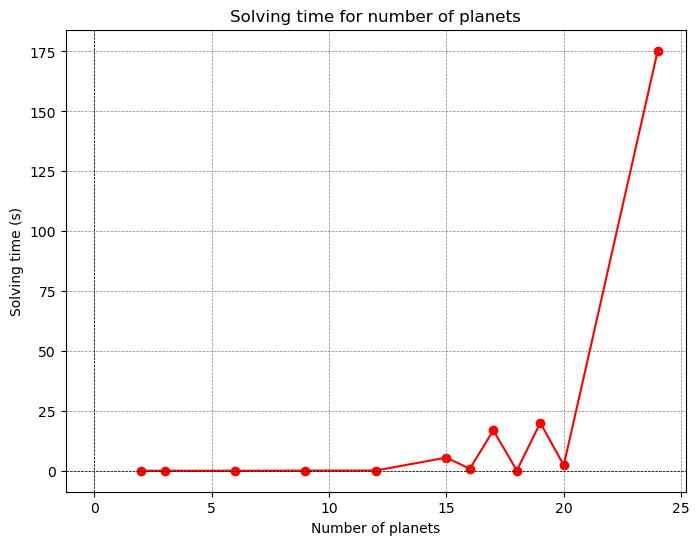

In [39]:
import matplotlib.pyplot as plt #import the plotting package

plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(num, times, color='red') # Plot x vs y (line)
plt.scatter(num, times, color='red')  # Plot x vs y (points)
plt.title('Solving time for number of planets')  # Title of the plot
plt.xlabel('Number of planets')  # x-axis label
plt.ylabel('Solving time (s)')  # y-axis label
plt.axhline(0, color='black',linewidth=0.5, ls='--')  # x-axis
plt.axvline(0, color='black',linewidth=0.5, ls='--')  # y-axis
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)  # Add grid
plt.show()

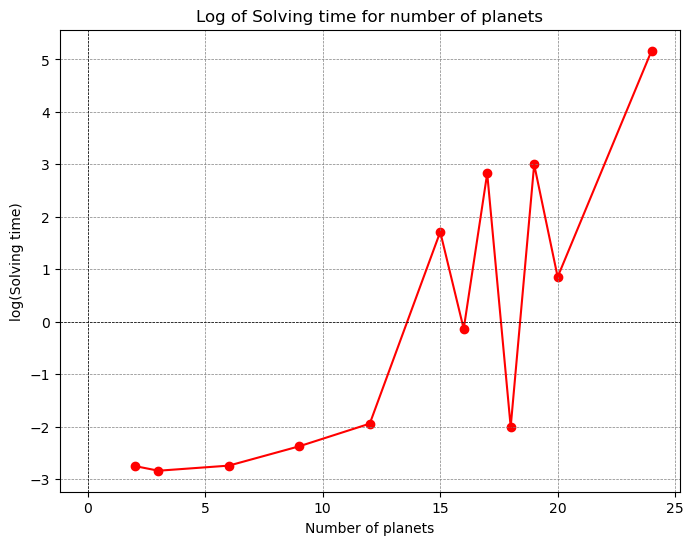

In [41]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(num, np.log(times), color='red') # Plot x vs y (line)
plt.scatter(num, np.log(times), color='red')  # Plot x vs y (points)
plt.title('Log of Solving time for number of planets')  # Title of the plot
plt.xlabel('Number of planets')  # x-axis label
plt.ylabel('log(Solving time)')  # y-axis label
plt.axhline(0, color='black',linewidth=0.5, ls='--')  # x-axis
plt.axvline(0, color='black',linewidth=0.5, ls='--')  # y-axis
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)  # Add grid
plt.show()

The behavior of the solving time with the respect to the number of planets *n*, that is, with respect to the size of the problem (as the number of variables is $m\cdot n^2+n^2$, where $m\cdot n^2$ is the number of continuous variables and $n^2$ is the number of binary variables) doesn't have a straight forward behavior. It would be expected that the solving time would steadily increase as the size of the problem increases, for more calculations are to be taken into account. The general tendency seems to point in that direction, with a steady increase until around $n=\,15$, but then an inestability region is found (more values have been plotted in that region to show that fact), where the solving time oscillates between high times (in the order of 10 s) and low times (in the order of 1 s, as the times for small sizes of the problem). For values greater than 20, a significant increse in the solving time is found, but again finding an unstable behavior, with some values of *n* returning a value and other not finishing for very long periods of time (no solution found for hours even, kernels were restarted and those values were rejected for study due to time constraints). This strange behavior may be due to strange combinatory issues, or the process of randomly generating the data.




## h) For the integer problem in e), solve several instances with the same data, using (10 to 20) different values for one of the parameters in the model (choose a parameter you think may provide insights for the interpretation of the different solution values). Collect the resulting optimal values of the objective function, print and plot them. Comment on these values.

To end the problem, a study of the values of the objective function based on the surplus of resources available was performed. To this end the parameter $\epsilon$ of the model was modified from 1 to 5, in steps of 0.2, so that the total stock of each resource goes from the the total demand of each resource to five times that total demand. 

A function was defined to create a model like the one in e) depending on the value of $\epsilon$, that returns the value for the objective function at the optimal.

In [29]:
n=6 #go back to the case with 6 planets

#Define a function that, given a value for epsilon *e*, returns the value of the objective function at the optimal point.
def model_par(e):
    
    #GENERATE DATA
    
    np.random.seed(241024) #set the seed to ensure reproducibility
    
    #Distance matrix
    upper_tri = np.random.uniform(0, 1, size=(n, n)) #randomly generate an upper triangular matrix with values uniformly distributed
                                                 #between 0 and 1

    dist= np.triu(upper_tri) + np.triu(upper_tri, 1).T #create a symmetric matrix by adding the upper triangular matrix and its
                                                       #transpose

    np.fill_diagonal(dist,0) #fill the diagonal with zeros (the distance from a planet to itself is zero)


    #Cost matrix

    cost=c*dist

    #Demand matrix

    d_1=np.random.uniform(0, 500, size=n) #generate average demands of resource 1 (minerals) for each planet

    D1=sum(d_1) #total demand of resource 1 (minerals)

    d_2=np.random.uniform(0, 1200, size=n) #generate average demand of resource 2 (crops) for each planet

    D2=sum(d_2) #total demand of resource 2 (crops)

    d_3=np.random.uniform(0, 350, size=n) #generate average demand for resource 3 (fuel)

    D3=sum(d_3) #total demand of resource 3(fuel)

    dem=np.column_stack((d_1, d_2, d_3))

    #Stock matrix

    epsilon=e #defines surplus of resources

    S1=epsilon*D1 #defines the total amount of resource 1 available

    s_1=np.random.dirichlet(np.ones(n))*S1 #generate random set of proportions so that the total stock is shared among all the 
                                           #planets

    S2=epsilon*D2 #defines the total amount of resource 2 available

    s_2=np.random.dirichlet(np.ones(n))*S2 #generate random set of proportions so that the total stock is shared among all the 
                                           #planets

    S3=epsilon*D3 #defines the total amount of resource 2 available

    s_3=np.random.dirichlet(np.ones(n))*S3 #generate random set of proportions so that the total stock is shared among all the 
                                           #planets


    stock=np.column_stack((s_1, s_2, s_3))
    
    #IMPLEMENT THE MODEL

    #Import the pyomo package and the solver

    opt = pyo.SolverFactory('glpk')

    #Create the model
    model = pyo.ConcreteModel(name="ECON")

    #Sets
    model.I = pyo.RangeSet(1,n)
    model.J = pyo.RangeSet(1,n)
    model.K =pyo.RangeSet(1,m)

    M=2000

    #Variables
    model.x = pyo.Var(model.I, model.J, model.K, domain=pyo.NonNegativeReals, initialize=0)

    model.y =pyo.Var(model.I, model.J, domain=pyo.Binary)

    #Objective function
    def Obj_rule(model):
        return sum(cost[i-1,j-1]*model.x[i,j,k] for i in model.I for j in model.J for k in model.K)
    model.Obj = pyo.Objective(rule=Obj_rule, sense=pyo.minimize)
    
    #Constraints
    def material_constraint_rule(model, i, k): 
        return sum(model.x[j,i,k]-model.x[i,j,k] for j in model.J if (i!=j)) >= dem[i-1,k-1]-stock[i-1,k-1]
    model.material_Constraint = pyo.Constraint(model.I, model.K, rule=material_constraint_rule)

    def econ_constraint_rule(model, i):
        return sum(p[k-1]*model.x[j,i,k]-1.5*p[k-1]*model.x[i,j,k] for j in model.J if (i!=j) for k in model.K)<=0
    model.econ_Constraint = pyo.Constraint(model.I, rule=econ_constraint_rule)
    
    def no_inner_constraint_rule(model,i,k):
        return model.x[i,i,k] == 0
    model.no_inner_Constraint = pyo.Constraint(model.I, model.K, rule=no_inner_constraint_rule)
    
    def exchange_existence_constraint_rule(model, i, j, k):
        return model.x[i,j,k] <=M*model.y[i,j]
    model.exchange_existence_Constraint = pyo.Constraint(model.I, model.J, model.K, rule=exchange_existence_constraint_rule)
    
    def limit_exchanges_constraint_rule(model, i):
        return sum(model.y[i,j] for j in model.J)<=2
    model.limit_exchanges_Constraint=pyo.Constraint(model.I, rule=limit_exchanges_constraint_rule)
    
    def equality_constraint_rule(model, i, j):
        return model.y[i,j]==model.y[j,i]
    model.equality_Constraint = pyo.Constraint(model.I, model.J, rule=equality_constraint_rule)
    
    
    #Get the solution
    
    results = opt.solve(model,tee=False)
    
    objective_value=model.Obj() #get the value of the objective function at the optimal
    
    return objective_value

Defining a vector with the different values for the amount of surplus of resources, the function is run for each one to obtain its optimal value, and then is stored in a vector.

In [32]:
eps=np.arange(1,5.1,0.2)

opt_values=np.zeros(len(eps))

for i in range(len(eps)):
    opt_values[i]=model_par(eps[i])
    
    print('epsilon= ', f"{eps[i]:.1f}", '; Objective function value= ', opt_values[i])

   
    

epsilon=  1.0 ; Objective function value=  64588.96656257513
epsilon=  1.2 ; Objective function value=  51575.05006579016
epsilon=  1.4 ; Objective function value=  41893.078395958015
epsilon=  1.6 ; Objective function value=  37315.80239278791
epsilon=  1.8 ; Objective function value=  33474.938782757985
epsilon=  2.0 ; Objective function value=  29964.08699767603
epsilon=  2.2 ; Objective function value=  28359.246542063916
epsilon=  2.4 ; Objective function value=  28080.93316168014
epsilon=  2.6 ; Objective function value=  27825.530375685135
epsilon=  2.8 ; Objective function value=  27600.05802698546
epsilon=  3.0 ; Objective function value=  27374.585678285817
epsilon=  3.2 ; Objective function value=  27149.113329586176
epsilon=  3.4 ; Objective function value=  26923.640980886536
epsilon=  3.6 ; Objective function value=  26698.168632186855
epsilon=  3.8 ; Objective function value=  26472.69628348722
epsilon=  4.0 ; Objective function value=  26247.223934787573
epsilon=  4.2 ;

The plot below shows the evolution of the value of the total transportation cost with respect to $\epsilon$, that is with respect to the ratio $\epsilon=\,\frac{\text{Total stock}}{\text{Total demand}}$.

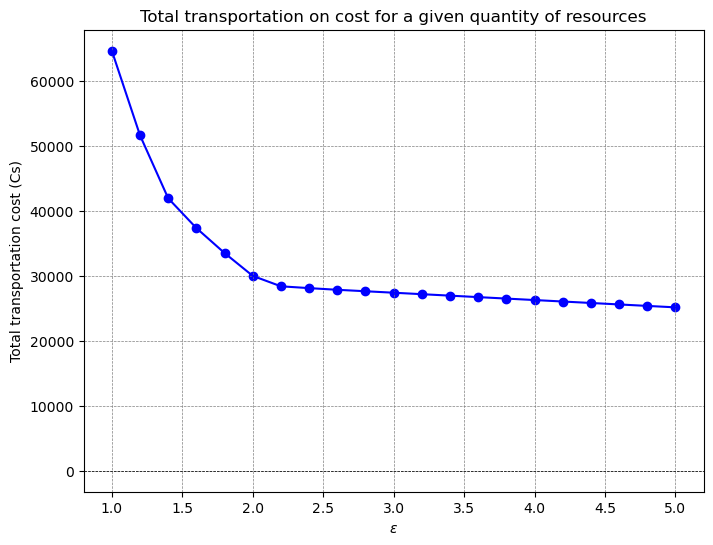

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(eps, opt_values, color='blue')
plt.scatter(eps, opt_values, color='blue')  # Plot x vs y
plt.title('Total transportation on cost for a given quantity of resources')  # Title of the plot
plt.xlabel('$\epsilon$')  # x-axis label
plt.xlim(left=0.8) #set the initial x-value at 0.8
plt.ylabel('Total transportation cost (Cs)')  # y-axis label
plt.axhline(0, color='black',linewidth=0.5, ls='--')  # x-axis
plt.axvline(0, color='black',linewidth=0.5, ls='--')  # y-axis
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)  # Add grid
plt.show()

It can be seen that the total transportation cost decreases as $\epsilon$ increases. This makes sense, as $\epsilon$ marks the ratio between the total stock and total demand of resources. In this regard, the plot represents the total transportation cost for situations ranging from when the total stock is equal to the total demand (no surplus, the minimum so that the problem is solvable) to when the total stock is 5 times the total demand. It would be expected that, if that the total amount of resources is five times the total demanded quality (a huge surplus), that all planets will have met their demands and that the transportation cost would then be zero. However, as can be seen, even though the total transportation cost decreases as $\epsilon$ increases, it decreases ever slower, so there may be some random elements that establish that it is very difficult that all demands are met. 

In order to see when that total transportation cost reaches zero, that is, when each planet has enough resources and no commerce is needed, high values of $\epsilon$ were explored.

In [41]:
eps=np.arange(100,1000,100)

opt_values=np.zeros(len(eps))

for i in range(len(eps)):
    opt_values[i]=model_par(eps[i])
    
    print('epsilon= ', f"{eps[i]:.1f}", '; Objective function value= ', opt_values[i])

epsilon=  100.0 ; Objective function value=  13912.924563257813
epsilon=  200.0 ; Objective function value=  10518.266001960059
epsilon=  300.0 ; Objective function value=  7123.607440662308
epsilon=  400.0 ; Objective function value=  3728.948879364557
epsilon=  500.0 ; Objective function value=  334.2903180668028
epsilon=  600.0 ; Objective function value=  0.0
epsilon=  700.0 ; Objective function value=  0.0
epsilon=  800.0 ; Objective function value=  0.0
epsilon=  900.0 ; Objective function value=  0.0


Numerically for this problem, in order to salvage the random nature of the generation of the demands and stocks so that no exchanges are needed, the total stock must be more than *500* times greater than the total demand, which doesn't sound realistic at all. In a real-world non-random situation, it is expected that this number should be must smaller.

The issue with this problem may be found with the "economic balance constraints", which make that, once a planet is in need of a resource, it must also sell some resoruces so as not to be bankrupted. Then, as the random generation of stocks and demands seems to make it so that it is highly unlikely that all stocks for each planets and resource are higher than their respective demands (counterintuitively for the very high surplus of resoruces, that are nonetheless randomly distributed among the planets), resources need to reach other destinations, and then extra exchanges are needed to ensure the so-called economic balance.